In [1]:
import pandas as pd

# Load dataset
dataset = pd.read_csv('transaction.csv')
# Tampilkan dataset
dataset.head()

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland


In [2]:
# Hitung kemunculan tiap Country pada dataset
country = dataset['Country'].value_counts()
# Menampilkan hasil
print("\nJumlah kemunculan tiap Country:")
print(country)


Jumlah kemunculan tiap Country:
Germany                 2269
France                  2109
EIRE                    1620
Netherlands              634
Spain                    539
Belgium                  486
Switzerland              434
Portugal                 367
Australia                356
Norway                   239
Italy                    190
Channel Islands          184
Finland                  152
Cyprus                   113
Sweden                   109
Denmark                   98
Japan                     92
Austria                   88
Poland                    80
Israel                    61
USA                       47
Singapore                 45
Unspecified               44
Canada                    36
Iceland                   35
Greece                    33
United Arab Emirates      23
Malta                     15
RSA                       14
Brazil                     8
Lithuania                  8
Lebanon                    5
European Community         5
Czech Repu

In [3]:
# Hitung rata-rata jumlah barang (Qty) per transaksi pada tiap negara
transaksi = dataset.groupby(['Country', 'InvoiceNo'])['Qty'].sum().groupby('Country').mean()
# Menampilkan hasil
print("\nBanyaknya transaksi pada tiap negara:")
print(transaksi)


Banyaknya transaksi pada tiap negara:
Country
Australia               4026.295455
Austria                 3420.250000
Bahrain                 1470.000000
Belgium                 3032.714286
Brazil                  4389.000000
Canada                  6449.666667
Channel Islands         4569.714286
Cyprus                  3550.875000
Czech Republic          1239.500000
Denmark                 3018.888889
EIRE                    3788.866071
European Community       921.666667
Finland                 3118.000000
France                  3197.549419
Germany                 3119.766578
Greece                  3473.000000
Iceland                 3267.666667
Israel                  7046.500000
Italy                   3186.096774
Japan                   3089.857143
Lebanon                 2836.000000
Lithuania               2013.000000
Malta                   3758.500000
Netherlands             4402.934211
Norway                  4679.107143
Poland                  2528.529412
Portugal         

In [4]:
from sklearn.cluster import KMeans

# Inisialisasi variabel
cluster_i = []
cluster_val = []

# Lakukan clustering dengan K-Means sebanyak 10 kali
for i in range(1, 11):
    kmeans = KMeans(n_clusters=3, random_state=0)
    kmeans.fit(transaksi.values.reshape(-1, 1))
    cluster_i.append(i)
    cluster_val.append(kmeans.inertia_)

In [5]:
# Ambil cluster_i yang mempunyai cluster_val terkecil
best_cluster = cluster_i[cluster_val.index(min(cluster_val))]

In [6]:
# Lakukan clustering dengan jumlah cluster terbaik
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(transaksi.values.reshape(-1, 1))

# Posisi centroid dari setiap cluster
centroids = kmeans.cluster_centers_
print(centroids)

[[6173.85081301]
 [3542.21952146]
 [1400.13034188]]


In [7]:
# Urutkan posisi centroid secara ascending
sorted_centroids = sorted(centroids)
print(sorted_centroids)

[array([1400.13034188]), array([3542.21952146]), array([6173.85081301])]


In [8]:
# Tentukan cluster transaksi rendah, sedang, dan tinggi
low_cluster = list(centroids).index(sorted_centroids[0])
medium_cluster = list(centroids).index(sorted_centroids[1])
high_cluster = list(centroids).index(sorted_centroids[2])

# Tampilkan negara mana saja yang transaksinya rendah, sedang, dan tinggi
low_transaksi_countries = transaksi.index[kmeans.labels_ == low_cluster]
medium_transaksi_countries = transaksi.index[kmeans.labels_ == medium_cluster]
high_transaksi_countries = transaksi.index[kmeans.labels_ == high_cluster]

# Menampilkan hasil
print(low_transaksi_countries)
print(medium_transaksi_countries)
print(high_transaksi_countries)

Index(['Bahrain', 'Czech Republic', 'European Community', 'Lithuania',
       'Saudi Arabia', 'Sweden'],
      dtype='object', name='Country')
Index(['Australia', 'Austria', 'Belgium', 'Brazil', 'Channel Islands',
       'Cyprus', 'Denmark', 'EIRE', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'Italy', 'Japan', 'Lebanon', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Spain', 'Unspecified'],
      dtype='object', name='Country')
Index(['Canada', 'Israel', 'RSA', 'Singapore', 'Switzerland', 'USA',
       'United Arab Emirates'],
      dtype='object', name='Country')


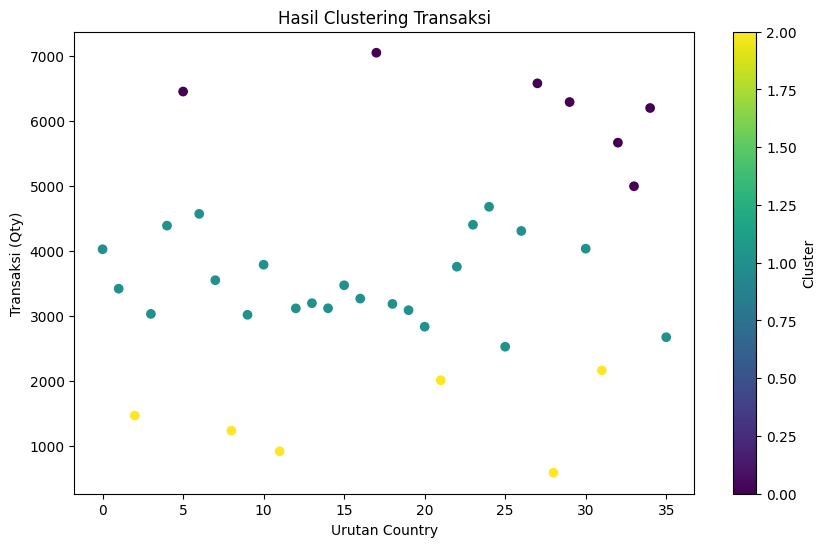

In [9]:
import matplotlib.pyplot as plt

# Visualisasi hasil cluster
plt.figure(figsize=(10, 6))
plt.scatter(range(len(transaksi)), transaksi.values, c=kmeans.labels_, cmap='viridis')
plt.xlabel('Urutan Country')
plt.ylabel('Transaksi (Qty)')
plt.title('Hasil Clustering Transaksi')
plt.colorbar(label='Cluster')
plt.show()